# Laboratorio # 3
## Kimberly Alejandra Rivera Gonzalez
## 20001676

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Cargamos Dataset

In [4]:
data = pd.read_csv('train.csv')

print(str(data.shape) + '\n')

data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Análisis de Datos para toma de decisiones en FE Pipeline

##### 2.1 Análisis del Target


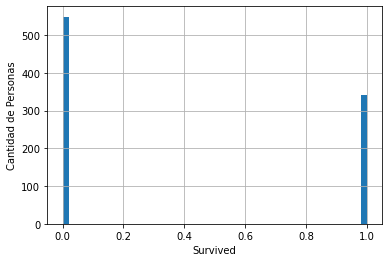

In [5]:
data['Survived'].hist(bins=50, density=False)
plt.xlabel("Survived")
plt.ylabel("Cantidad de Personas")
plt.show()

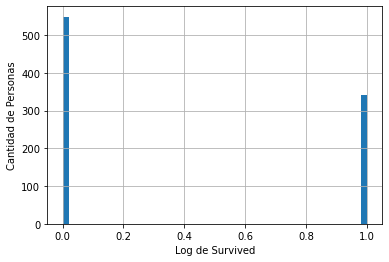

In [6]:
#transformación de target con power.
np.power(data['Survived'],3).hist(bins=50, density=False)
plt.xlabel("Log de Survived")
plt.ylabel("Cantidad de Personas")
plt.show()

#### 2.2 Verificamos tipos de variables en X

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
#cantidad de variables categóricas
len(cat_vars)

5

In [10]:
#Forzamos a todas las variables como categóticas
data[cat_vars] = data[cat_vars].astype('O')

In [11]:
#variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
num_vars

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
len(num_vars)

6

#### 2.3 Análisis de Valores Faltantes

In [13]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

3

In [14]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

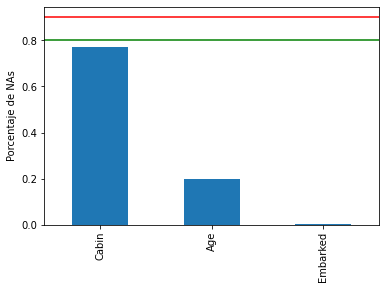

In [15]:
#graficamos porcentajes de NAs.
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [16]:
#variables categóricas con NAs.
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [17]:
#variables numéricas con NAs.
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [18]:
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóticas con NAs. {}".format(len(cat_na)))

Cantidad de variables numéricas con NAs. 1
Cantidad de variables categóticas con NAs. 2


#### 2.3.1 Verificación del impacto del NA contra el Target (Survived)

In [19]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

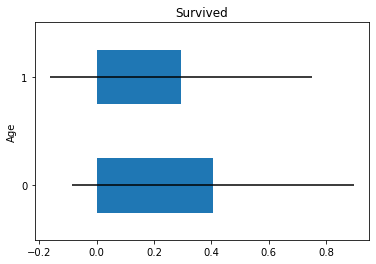

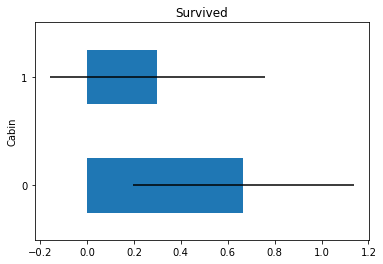

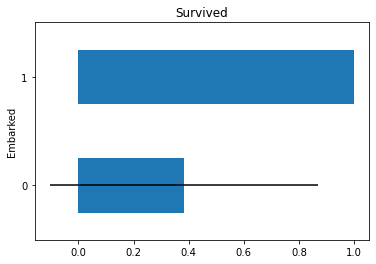

In [20]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')

2.4 No sé realiza el Análisis de Variables Temporales porque el dataset no contiene fechas.

## 2.5 Variables Discretas

In [21]:
discrete_vars = [var for var in num_vars if(len(data[var].unique()) < 20)]
discrete_vars

['Pclass', 'SibSp', 'Parch']

In [22]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  3


In [23]:
data[discrete_vars].head()

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


In [24]:
import seaborn as sns

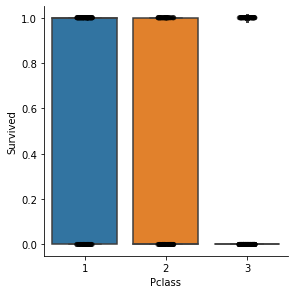

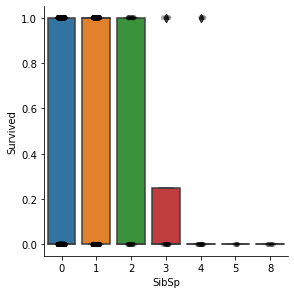

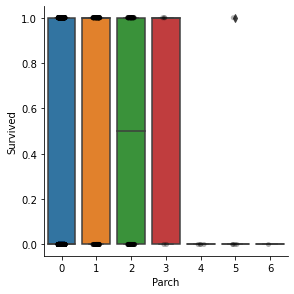

In [25]:
for var in discrete_vars:
    sns.catplot(x=var, y = 'Survived', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

## 2.6 Variables Continuas

In [26]:
cont_vars = [var for var in num_vars if var not in discrete_vars]

In [27]:
print("Variables Numericas Continuas: ", len(cont_vars))

Variables Numericas Continuas:  3


In [28]:
data[cont_vars].head()

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


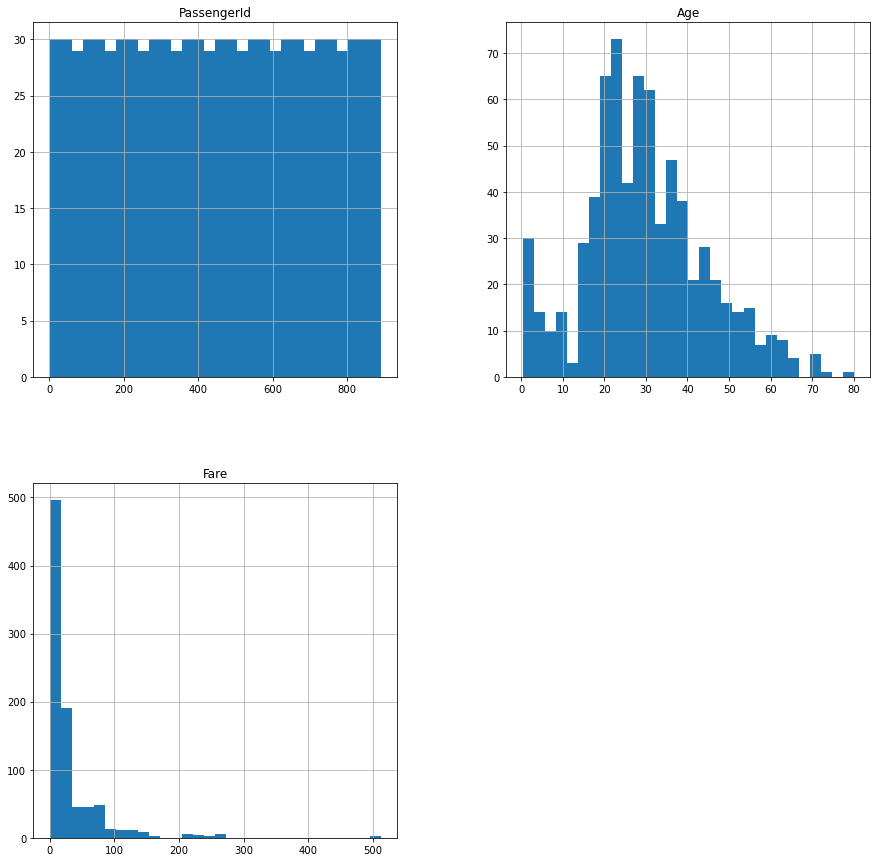

In [29]:
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [30]:
sesgadas = ['Fare']

In [31]:
cont_vars = [var for var in cont_vars if var not in sesgadas]

In [32]:
cont_vars

['PassengerId', 'Age']

#### Transformación de Yeo-Johnson

In [33]:
import scipy.stats as stats

In [34]:
temp_yj = data.copy()

In [35]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

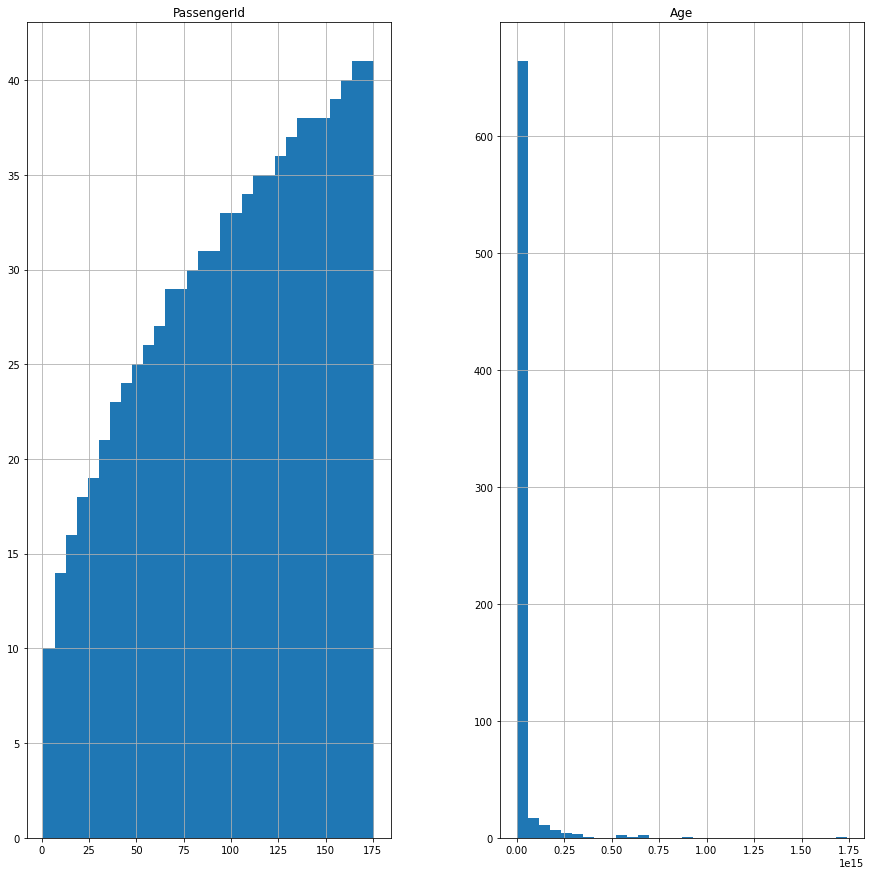

In [36]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [37]:
len(cont_vars)

2

In [38]:
cont_specials = ['PassengerId', 'Age']

In [39]:
temp = data.copy()

for var in cont_vars:
    temp[var] = np.log(data[var] + 1)

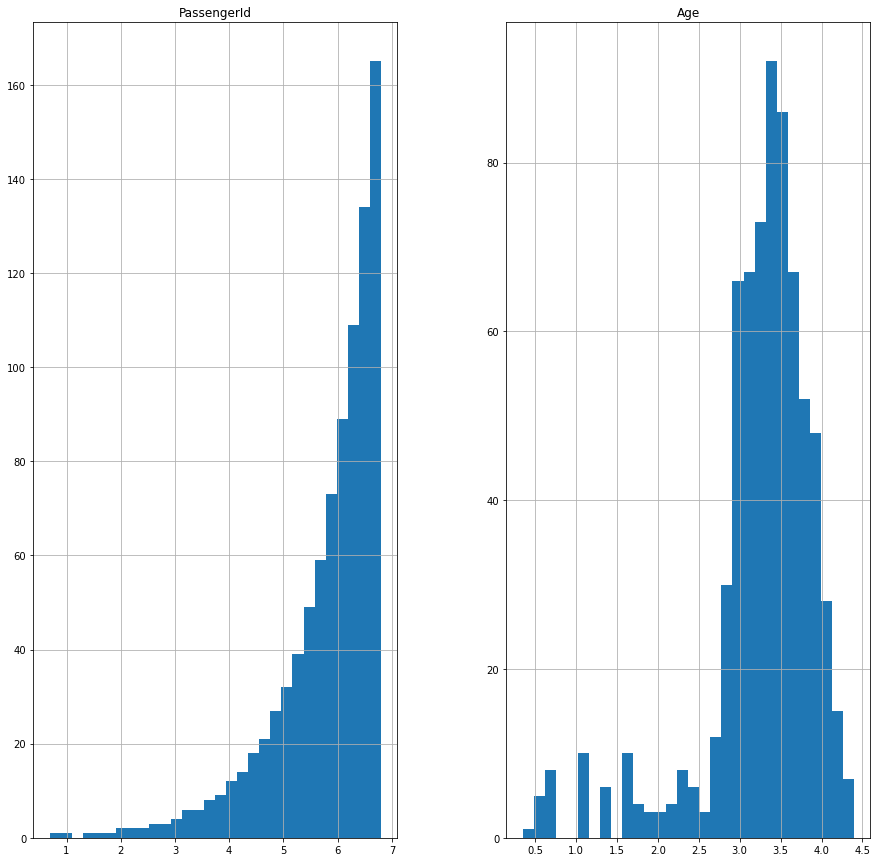

In [40]:
temp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

C:\Users\kimbe\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


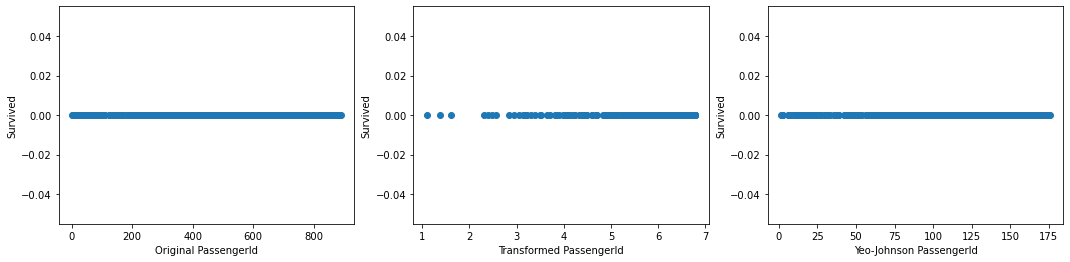

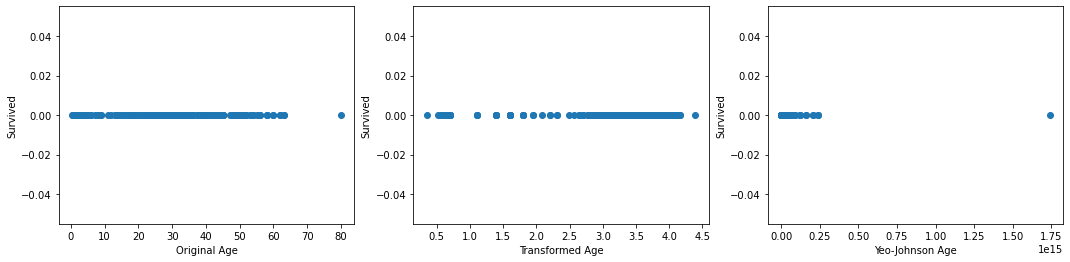

In [41]:
for var in cont_vars:
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Original " + var)
    
    plt.subplot(1, 3, 2)
    plt.scatter(temp[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Transformed " + var)
    
    plt.subplot(1, 3, 3)
    plt.scatter(temp_yj[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Yeo-Johnson " + var)

    plt.show()

### 2.6.1 Variables con Sesgo

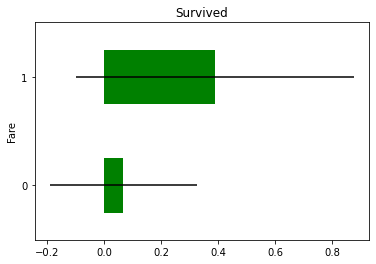

In [42]:
for var in sesgadas:
    temp = data.copy()
    
    temp[var] = np.where(data[var] == 0, 0, 1)
    
    temp = temp.groupby(var)['Survived'].agg(['mean', 'std'])
    
    temp.plot(kind='barh', y="mean", legend=False, xerr="std", title = "Survived", color="green")
    plt.show()

## 2.7 Variables Categóricas

In [43]:
len(cat_vars)

5

In [44]:
data[cat_vars].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


<AxesSubplot:>

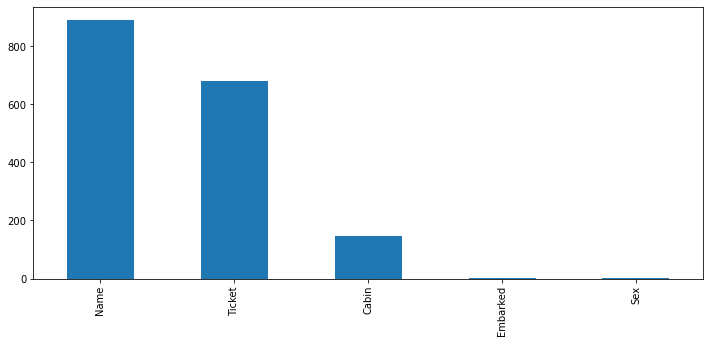

In [45]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [47]:
np.unique(data['Name'])

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

In [48]:
np.unique(data['Ticket'])

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

In [54]:
##np.unique(data['Cabin'])

In [55]:
##np.unique(data['Embarked'])

In [56]:
np.unique(data['Sex'])

array(['female', 'male'], dtype=object)

No se tienen variables que contengan las mismas opciones.

## 2.7 Rare Labels:

In [57]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['Survived'].count()/len(df)
    
    return temp[temp < rare_perc]

In [60]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Name
Abbing, Mr. Anthony                      0.001122
Abbott, Mr. Rossmore Edward              0.001122
Abbott, Mrs. Stanton (Rosa Hunt)         0.001122
Abelson, Mr. Samuel                      0.001122
Abelson, Mrs. Samuel (Hannah Wizosky)    0.001122
                                           ...   
de Mulder, Mr. Theodore                  0.001122
de Pelsmaeker, Mr. Alfons                0.001122
del Carlo, Mr. Sebastiano                0.001122
van Billiard, Mr. Austin Blyler          0.001122
van Melkebeke, Mr. Philemon              0.001122
Name: Survived, Length: 891, dtype: float64

Series([], Name: Survived, dtype: float64)

Ticket
110152         0.003367
110413         0.003367
110465         0.002245
110564         0.001122
110813         0.001122
                 ...   
W./C. 6608     0.004489
W./C. 6609     0.001122
W.E.P. 5734    0.001122
W/C 14208      0.001122
WE/P 5735      0.002245
Name: Survived, Length: 681, dtype: float64

Cabin
A10    0.001122
A14    0.001122
A1

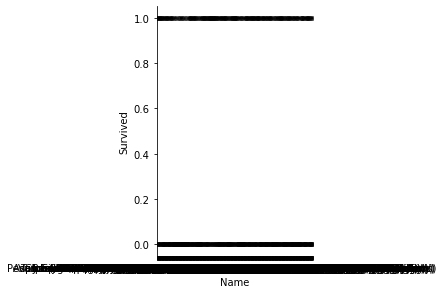

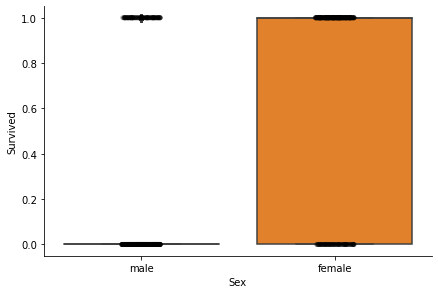

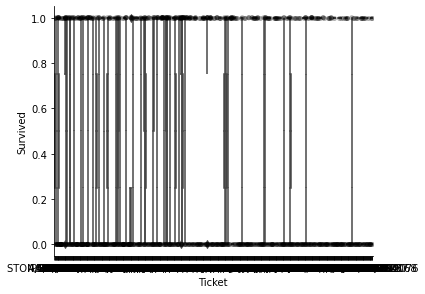

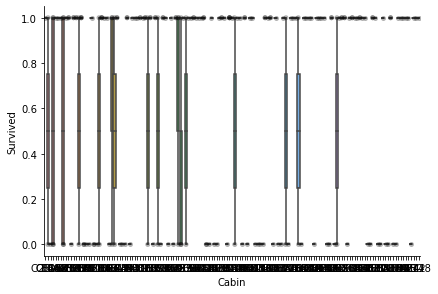

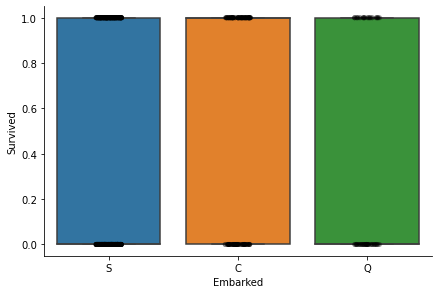

In [61]:
for var in cat_vars:
    sns.catplot(x=var, y = 'Survived', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()